In [2]:
import sys
sys.path.append('../../../vysxd')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from FPC_define import *

In [3]:
A, B, C= FPC('EPW-alves')

We are interested to see the energy transfer in velocity space, so we need to integrate over x

Alternatively, just pick an x position that you want to look at.

In [4]:

delta = 65

A_int_wrt_x = np.trapz(A[:,16:16+delta,:], axis = 1)
B_int_wrt_x = np.trapz(B[:,16:16+delta,:], axis = 1)

# x_pos = 50
# A_int_wrt_x = A[x_pos,:,:]
# B_int_wrt_x = B[x_pos,:,:]


np.shape(A_int_wrt_x)

(128, 1094)

Now, integrate over a couple timesteps such that the dissipative energy transfer overpowers the oscillatory

In [128]:
FFMpegWriter = manimation.writers['ffmpeg']

metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=16, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure(figsize=(12,8))
window = 400
inter = 196
with writer.saving(fig, f"FPC_movie_kld-0.3_{500}.mp4", dpi=400):

# By my calculation, t = 6 starts at approximately i =9 4
    for i in range (100,500):

        A_full_int = (1./inter)*np.trapz(A_int_wrt_x[:,i:i+inter], axis = 1)
        B_full_int = (1./inter)*np.trapz(B_int_wrt_x[:,i:i+inter], axis = 1)
        plt.plot(np.linspace(-0.5,0.5, len(B_full_int)),B_full_int,label = r'$\frac{dW}{dt}(v)$')  
        # plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int+B_full_int, label = r'$\frac{dW}{dt}(v)$ with v $\cdot \nabla$ term')
        vphase = 0.199
        plt.vlines([vphase],ymin=-3e-5,ymax=3e-5, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black')
        plt.ylim(-1e-5,1e-5)
        #vphase_vtherm = 0.199*0.055
        #plt.vlines([vphase_vtherm],ymin=-9e-6,ymax=9e-6, label = r'$v_{\phi} =$'+ str(vphase_vtherm), colors = 'black')
        # plt.xlim(0,0.2)
        # plt.ylim(-0.0004,0.0004)
        plt.ylabel('integrated change in energy density')
        plt.xlabel('v/c')
        plt.title(f'Integrating from t = {round(i*2*0.032,0)} to {round((i+inter)*2*0.032,0)}')
        plt.legend()
        writer.grab_frame()
        plt.cla()
        plt.clf()


<Figure size 1200x800 with 0 Axes>

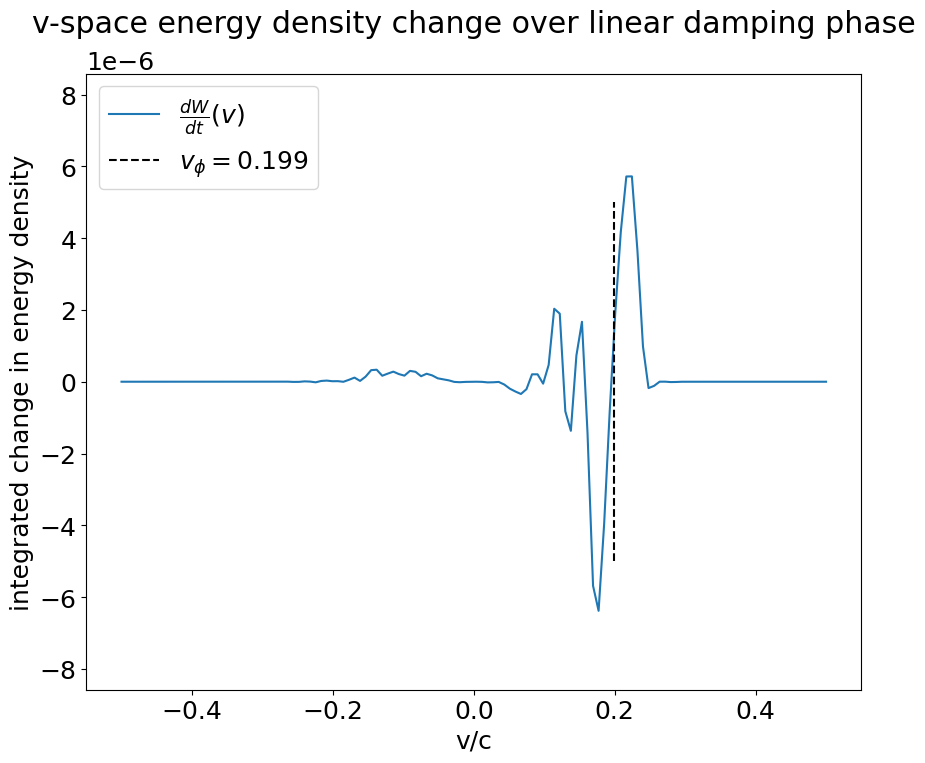

In [7]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
T = 156 # start of the time window at which I integrate over
interval = 312 # length of the time interval
time_interval = [T,T+interval]
A_full_int = 1/interval * np.trapz(A_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
B_full_int = 1/interval * np.trapz(B_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
plt.plot(np.linspace(-0.5,0.5, len(B_full_int)),B_full_int,label = r'$\frac{dW}{dt}(v)$')  
# plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int+B_full_int, label = r'$\frac{dW}{dt}(v)$ with v $\cdot \nabla$ term')
vphase = 0.199
plt.vlines([vphase],ymin=-5e-6,ymax=5e-6, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black', linestyles='--')
#plt.vlines([vphase+0.0258],ymin=-5e-6,ymax=5e-6, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black', linestyles='--')
#plt.vlines([vphase-0.0258],ymin=-5e-6,ymax=5e-6, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black', linestyles='--')

# plt.xlim(0,0.2)
plt.ylim(-1.5*np.max(B_full_int),1.5*np.max(B_full_int))
plt.ylabel('integrated change in energy density')
plt.xlabel('v/c')
plt.title('v-space energy density change over linear damping phase',pad = 30)
plt.legend()
plt.savefig('v-space energy density change over linear damping phase')

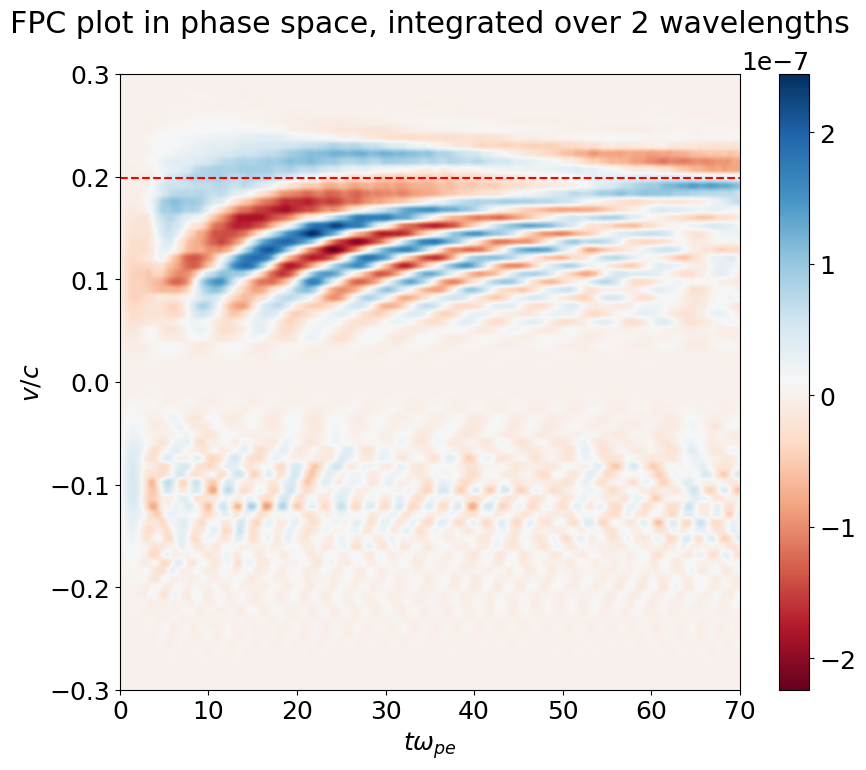

In [17]:
delta = 65
A_int_wrt_X = np.trapz((1./delta)*A[:,16:16+delta,:], axis = 1)
B_int_wrt_X = np.trapz((1./delta)*B[:,16:16+delta,:], axis = 1)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
plt.imshow(B_int_wrt_X, origin='lower',extent=[0,70,-0.5,0.5], aspect='auto', cmap = 'RdBu', interpolation=None)
plt.axhline(y = 0.199, color = 'r', linestyle = '--')
plt.colorbar()
plt.title("FPC plot in phase space, integrated over 2 wavelengths", pad=30)
plt.ylim(-0.3,0.3)
plt.ylabel('$v/c$')
plt.xlabel('$t \omega_{pe}$')
plt.savefig('V-space energy density evolving in time')

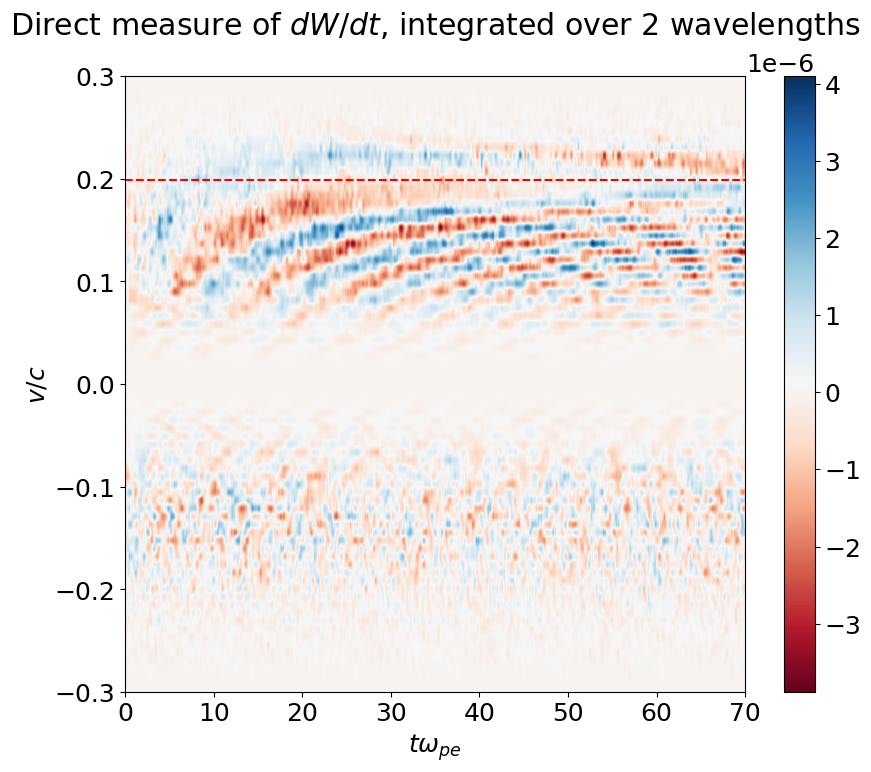

In [16]:
delta = 65
C_int_wrt_x = -np.trapz((1./delta)*C[:,16:16+delta,:], axis = 1)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
plt.imshow(C_int_wrt_x, origin='lower',extent=[0,70,-0.5,0.5], aspect='auto', cmap = 'RdBu', interpolation=None)
plt.axhline(y = 0.199, color = 'r', linestyle = '--')
plt.colorbar()
plt.title("Direct measure of $dW/dt$, integrated over 2 wavelengths", pad=30)
plt.ylim(-0.3,0.3)
plt.ylabel('$v/c$')
plt.xlabel('$t \omega_{pe}$')
plt.savefig('direct measure of dWdt')

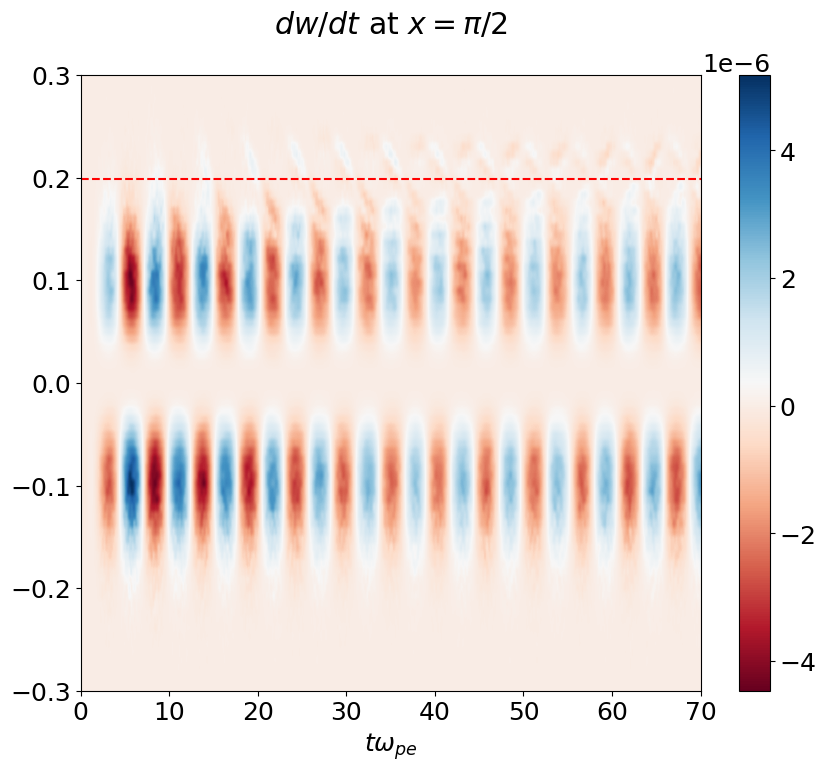

In [15]:
delta = 66
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
plt.imshow(B[:,48,:], origin='lower',extent=[0,70,-0.5,0.5], aspect='auto', cmap = 'RdBu', interpolation=None)
plt.axhline(y = 0.199, color = 'r', linestyle = '--')
plt.colorbar()
plt.title("$dw/dt$ at $x = \pi/2$", pad=30)
plt.ylim(-0.3,0.3)
plt.xlabel('$t \omega_{pe}$')
plt.savefig('dWdt_at_some_x')

(-0.3, 0.3)

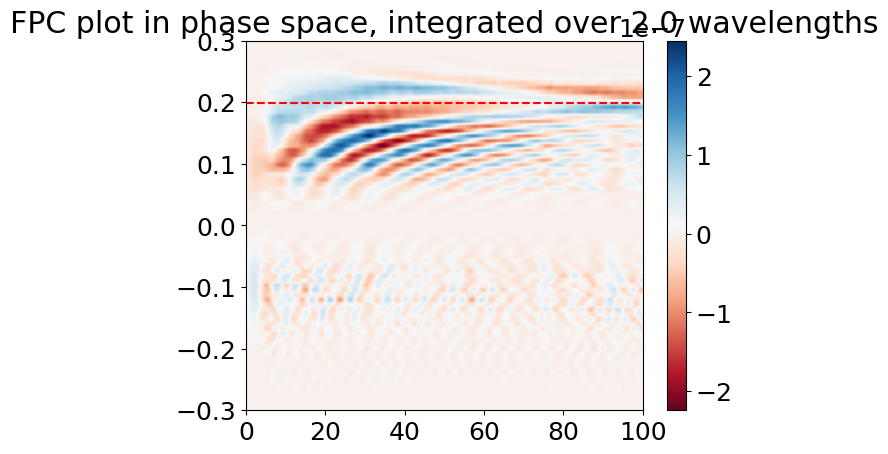

In [124]:
delta = 65
start = 16
A_int_wrt_X = np.trapz((1./delta)*A[:,start:start+delta:,:], axis = 1)
B_int_wrt_X = np.trapz((1./delta)*B[:,start:start+delta:,:], axis = 1)
plt.imshow(B_int_wrt_X, origin='lower',extent=[0,100,-0.5,0.5], aspect='auto', cmap = 'RdBu', interpolation=None)
plt.axhline(y = 0.199, color = 'r', linestyle = '--')
plt.colorbar()
plt.title(f"FPC plot in phase space, integrated over {round(delta/(96/3),0)} wavelengths")
plt.ylim(-0.3,0.3)

In [14]:
FFMpegWriter = manimation.writers['ffmpeg']

metadata = dict(title='periodicity-sensitivity-animation', artist='Matplotlib',
                comment='periodicity sensitivity of FPC') # Describe what the animation is
writer = FFMpegWriter(fps=3, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure(figsize=(12,8))
with writer.saving(fig, "Periodicity sensitivity.mp4", dpi=400):

# By my calculation, t = 6 starts at approximately i =9 4
    for delta in range (40,79):

        B_int_wrt_x = np.trapz((1./delta)*B[:,16:16+delta:,:], axis = 1)
        plt.imshow(B_int_wrt_x, origin='lower',extent=[0,70,-0.5,0.5], aspect='auto', cmap = 'RdBu', interpolation=None)
        plt.axhline(y = 0.199, color = 'r', linestyle = '--')
        plt.colorbar()
        plt.title("damping signature is only resolved at exactly one wavelength", pad=30)
        plt.ylim(-0.3,0.3)
        plt.ylabel('$v/c$')
        plt.xlabel('$t \omega_{pe}$')
        writer.grab_frame()
        plt.cla()
        plt.clf()

<Figure size 1200x800 with 0 Axes>